In [ ]:
"""
Purpose: To error out a branch that is doubling back
and its sibling if the angle between two branches is 
wide enough and the branches match in terms of width

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-22 06:40:30,936 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 06:40:30,937 - settings - Setting database.user to celiib
INFO - 2021-06-22 06:40:30,938 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 06:40:30,938 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 06:40:30,939 - settings - Setting database.user to celiib
INFO - 2021-06-22 06:40:30,939 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 06:40:30,943 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-22 06:40:31,413 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 06:40:31,459 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 06:40:31,460 - settings - Setting database.user to celiib
INFO - 2021-06-22 06:40:31,461 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 06:40:31,463 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 06:40:32,006 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 06:40:32,042 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 06:40:32,043 - settings - Setting database.user to celiib
INFO - 2021-06-22 06:40:32,043 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 06:40:32,044 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 06:40:32,045 - settings - Setting database.user to celiib
INFO - 2021-06-22 06:40:32,045 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-22 06:40:34,399 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 06:40:34,401 - settings - Setting database.user to celiib
INFO - 2021-06-22 06:40:34,402 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 06:40:34,405 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 06:40:35,092 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Pulling Down a Neuron

In [5]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(864691135212632448)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [7]:
neuron_obj = neuron_objs[0]

limb_name = L4
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L4 because was the limb in the first key


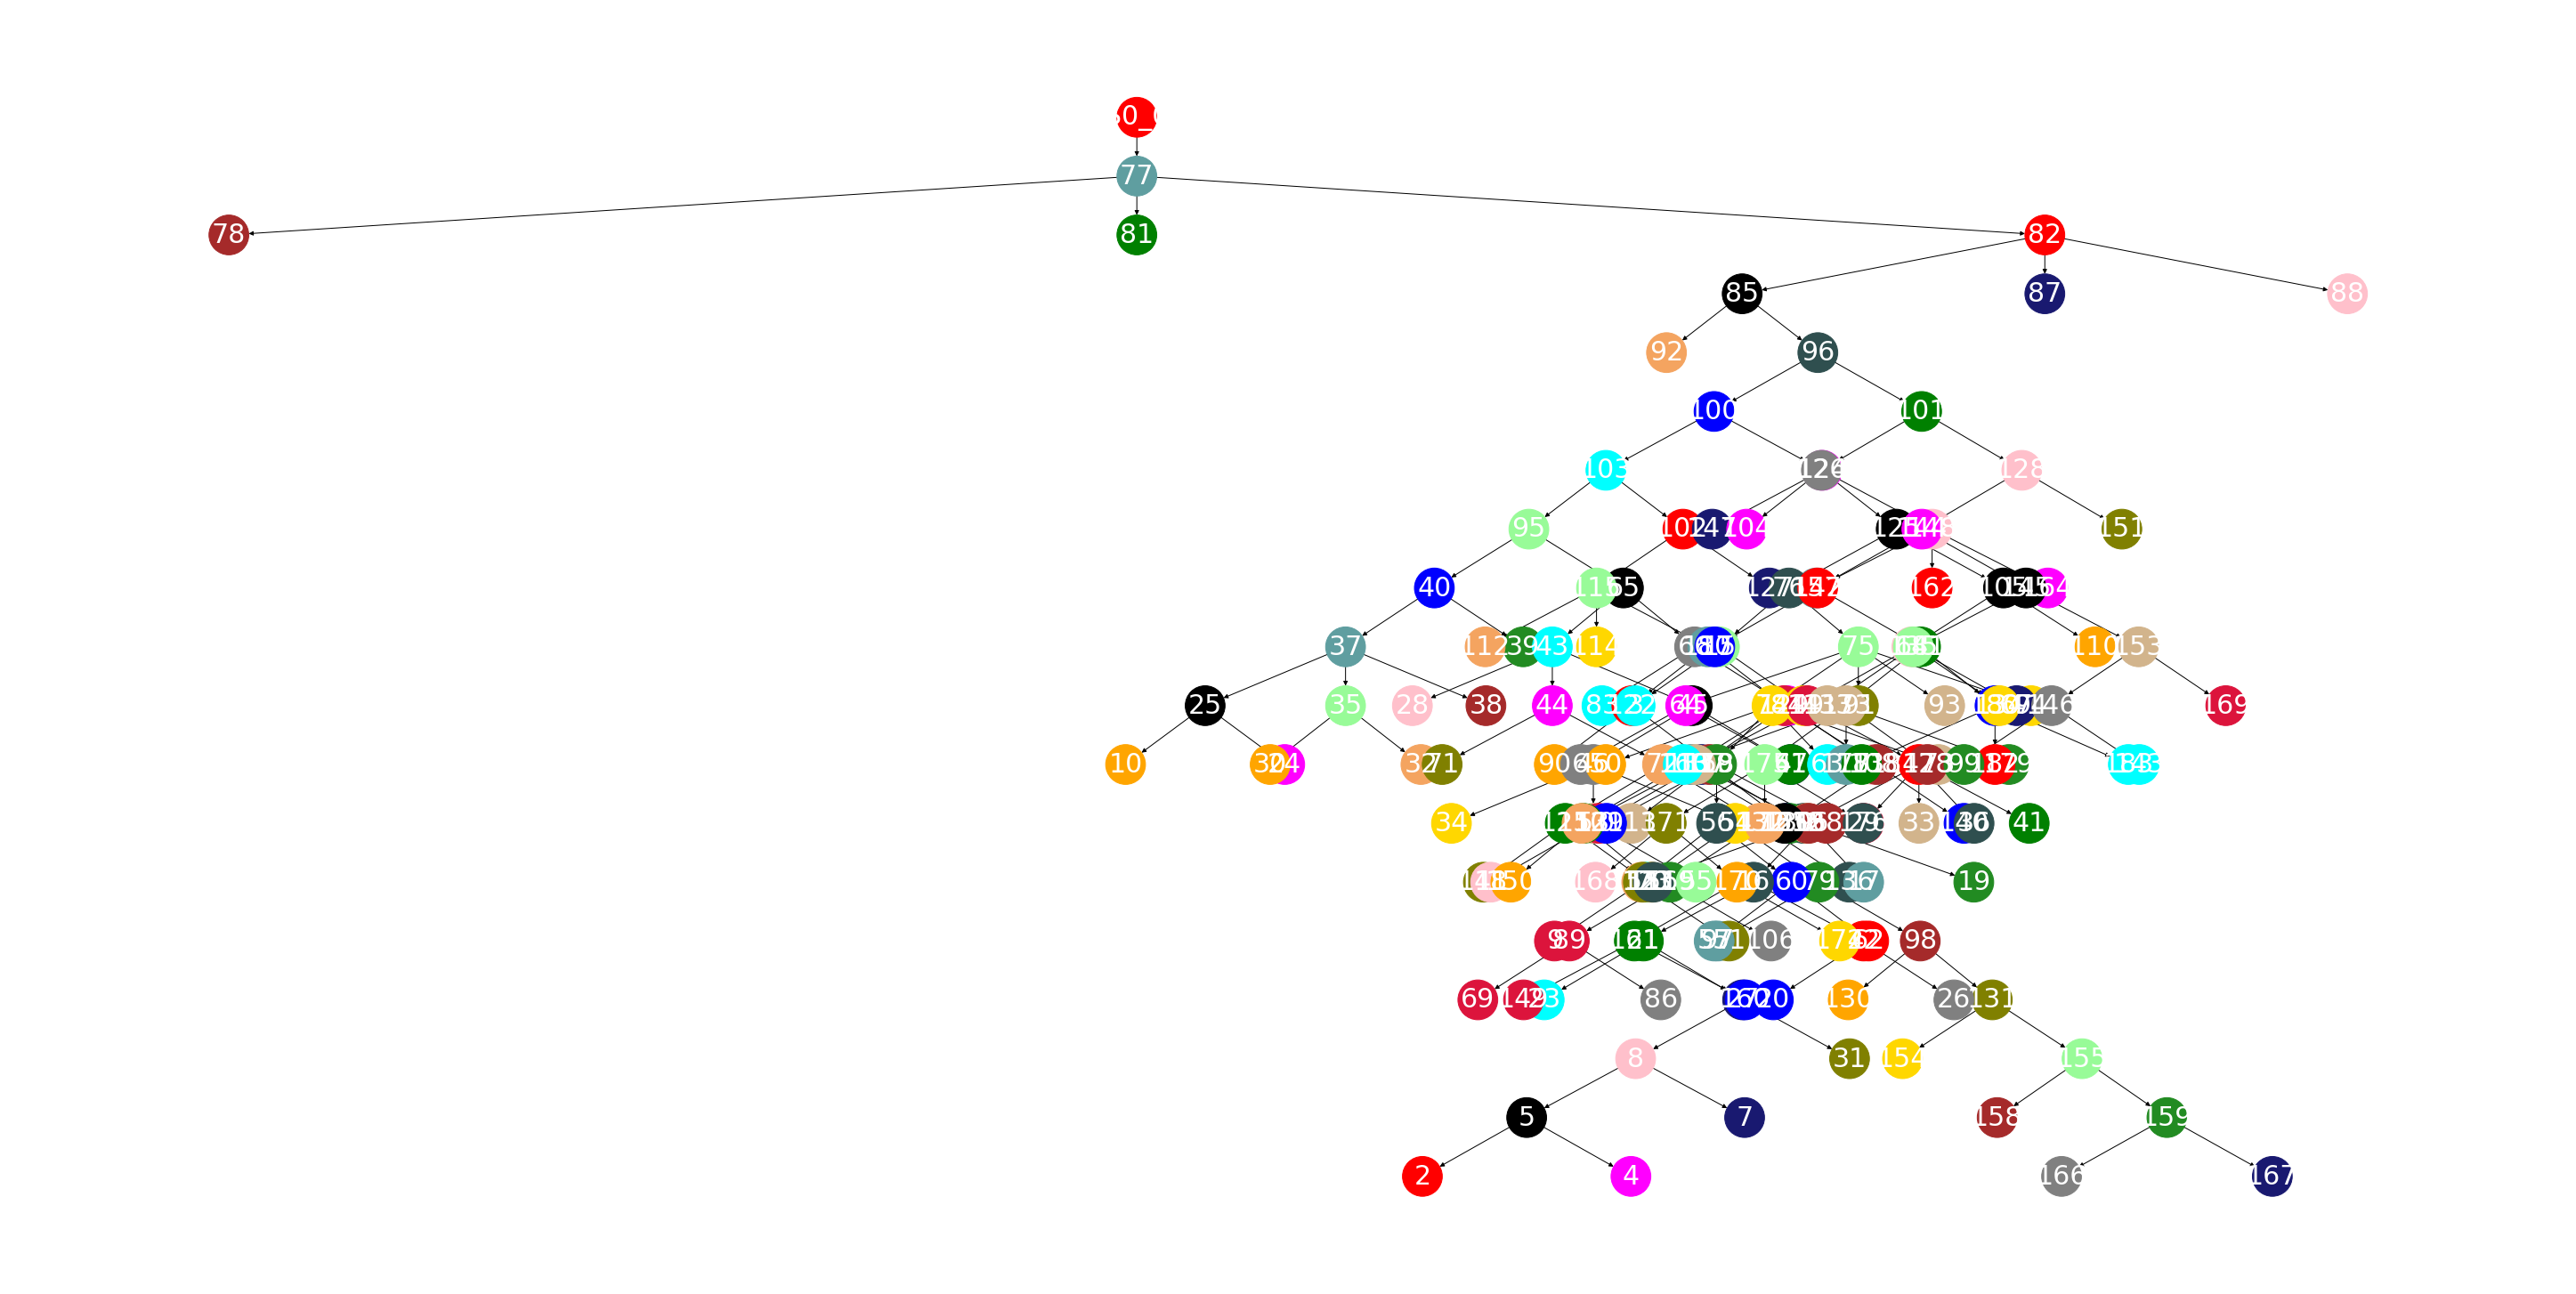

In [9]:
nviz.visualize_neuron_specific_limb(neuron_obj,
               neuron_obj.axon_limb_idx)

In [11]:
neuron_obj.axon_limb_name

'L4'

# Work on Dowstream Attributes

In [40]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [52]:
import synapse_utils as syu
syu.soma_synapses_to_scatter_info()

In [55]:
limb_obj.synapses

[]

In [54]:
syu.synapses_pre(limb_obj.synapses)

[]

In [ ]:
cnu.subgraph_around_branch?

In [ ]:
def downstream_synapses(limb_obj,
                       branch_idx,
                       downstream_distance = np.inf,
                       only_non_branching_downstream=True,
                        plot_synapses = False,
                        presyn_color = "yellow",
                        postsyn_color = "aqua",
                       verbose = False):
    """
    Purpose: To get the downstream skeleton of a branch
    
    Ex: 
    skel = downstream_skeleton(limb_obj,
                    96,
                           only_non_branching_downstream = False,
                           downstream_distance = 30000
                   )

    """
    
    synapses = nst.downstream_attribute(limb_obj = limb_obj,
    branch_idx = branch_idx,
    attribute_name = "synapses",
    downstream_distance = downstream_distance,
    only_non_branching_downstream = only_non_branching_downstream,
    verbose = verbose)

    if plot_skeleton:
        skel = nst.downstream_skeleton(limb_obj = limb_obj,
        branch_idx = branch_idx,
        downstream_distance = downstream_distance,
        only_non_branching_downstream = only_non_branching_downstream,
        verbose = False)
        
        
        
        nviz.plot_objects(skeletons=[skel],
                         )
        
    return skel

In [51]:
skel = nst.downstream_skeleton(limb_obj,
                    96,
                           only_non_branching_downstream = False,
                           downstream_distance = 40000,
                               plot_skeleton=True
                   )

In [39]:
import neuron_statistics as nst
nst.downstream_attribute(limb_obj = neuron_obj[neuron_obj.axon_limb_name],
    branch_idx = 96,
    attribute_name = "skeleton",
    concat_func = sk.stack_skeletons,

    downstream_distance = np.inf,
    only_non_branching_downstream = False,
    verbose = False)

array([[[650805.2       , 756346.1       , 788620.9       ],
        [650853.39005837, 756419.98380988, 788668.00521109]],

       [[650853.39005837, 756419.98380988, 788668.00521109],
        [650904.01126311, 756487.13014216, 788719.98559403]],

       [[650904.01126311, 756487.13014216, 788719.98559403],
        [650961.98061557, 756533.9124266 , 788786.70119968]],

       ...,

       [[791624.68174884, 774567.76605484, 872756.33226122],
        [791656.87511357, 774594.99854279, 872842.16469227]],

       [[791635.82362915, 774707.19748916, 872997.9823892 ],
        [791657.63664495, 774645.09642852, 872928.707294  ]],

       [[791656.87511357, 774594.99854279, 872842.16469227],
        [791657.63664495, 774645.09642852, 872928.707294  ]]])

In [24]:
cnu.branches_within_distance_downstream(limb_obj,
                                                          branch_idx,
                                                          np.inf,
                                                          include_branch_idx=True)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  79,
        80,  83,  84,  86,  89,  90,  91,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183])

In [33]:
nviz.plot_objects(skeletons=[down_attr_concat])

In [12]:
import networkx_utils as xu
import neuron_utils as nru

In [13]:
nru.downstream_nodes(limb_obj,branch_idx)

array([100, 101])

In [ ]:
limb_obj.get_branch_names

In [26]:


downstream_nodes_without_branching(limb_obj,96)

[]